In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



In [2]:
path = kagglehub.dataset_download("johndddddd/customer-satisfaction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Mike\.cache\kagglehub\datasets\johndddddd\customer-satisfaction\versions\2


In [3]:
df = pd.read_excel("satisfaction_2015.xlsx")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [5]:
df.shape

(129880, 24)

In [6]:
df

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,...,3,3,1,5,3,3,4,3,0,0.0
1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,...,3,2,1,1,4,4,3,2,0,0.0
2,29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,...,3,3,3,5,3,2,3,3,0,0.0
3,81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,...,4,4,5,4,5,5,5,4,0,0.0
4,83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,...,3,3,3,4,5,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,49202,satisfied,Female,Loyal Customer,35,Business travel,Business,2592,5,5,...,4,5,5,5,5,5,5,4,0,0.0
129876,16986,satisfied,Female,Loyal Customer,11,Business travel,Eco,610,5,1,...,5,5,5,4,1,2,5,5,82,65.0
129877,50316,satisfied,Male,Loyal Customer,46,Business travel,Business,86,1,1,...,5,5,1,3,1,5,2,2,0,0.0
129878,22333,satisfied,Female,Loyal Customer,35,Business travel,Business,83,1,1,...,5,5,4,4,2,5,5,5,0,0.0


In [7]:
nan_counts = df.isna().sum()
print(nan_counts)

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


In [8]:
df=df.dropna(subset=['Arrival Delay in Minutes'])

In [9]:


categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)



There are 5 categorical variables

The categorical variables are :

 ['satisfaction_v2', 'Gender', 'Customer Type', 'Type of Travel', 'Class']


In [10]:
for var in categorical: 
    
    print(df[var].value_counts())

satisfaction_v2
neutral or dissatisfied    73225
satisfied                  56262
Name: count, dtype: int64
Gender
Female    65703
Male      63784
Name: count, dtype: int64
Customer Type
Loyal Customer       105773
disloyal Customer     23714
Name: count, dtype: int64
Type of Travel
Business travel    89445
Personal Travel    40042
Name: count, dtype: int64
Class
Business    61990
Eco         58117
Eco Plus     9380
Name: count, dtype: int64


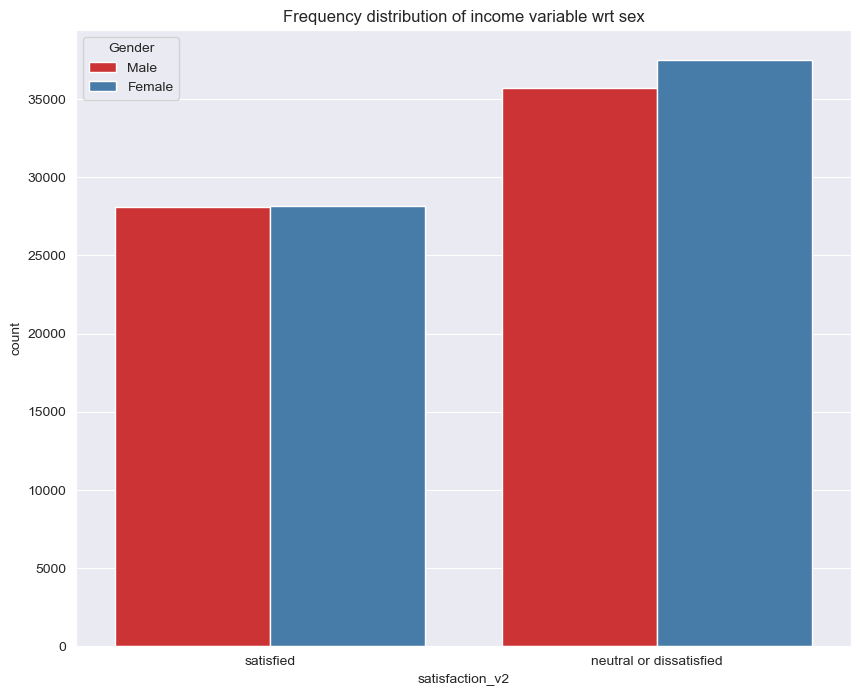

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="satisfaction_v2", hue="Gender", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt sex")
plt.show()

In [12]:
counts = df['Inflight wifi service'].value_counts()
print(counts)

Inflight wifi service
2    32236
3    32087
4    24702
1    22250
5    14304
0     3908
Name: count, dtype: int64


In [13]:
df['Age'].nunique()

75

C:\Users\Mike\AppData\Local\Temp\ipykernel_10544\3663701479.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins=10, color='blue')


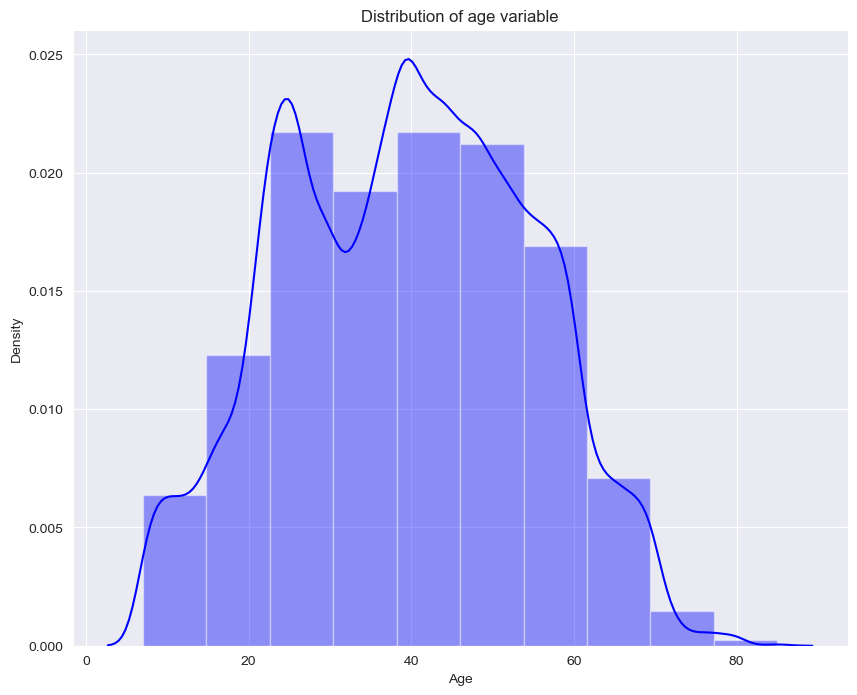

In [14]:
f, ax = plt.subplots(figsize=(10,8))
x = df['Age']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

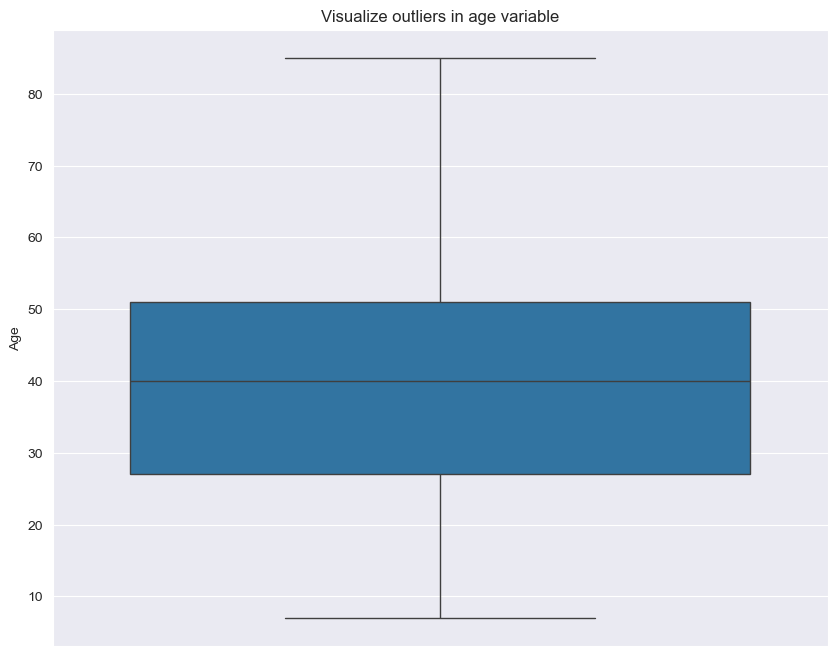

In [15]:
f, ax = plt.subplots(figsize=(10,8))
x = df['Age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

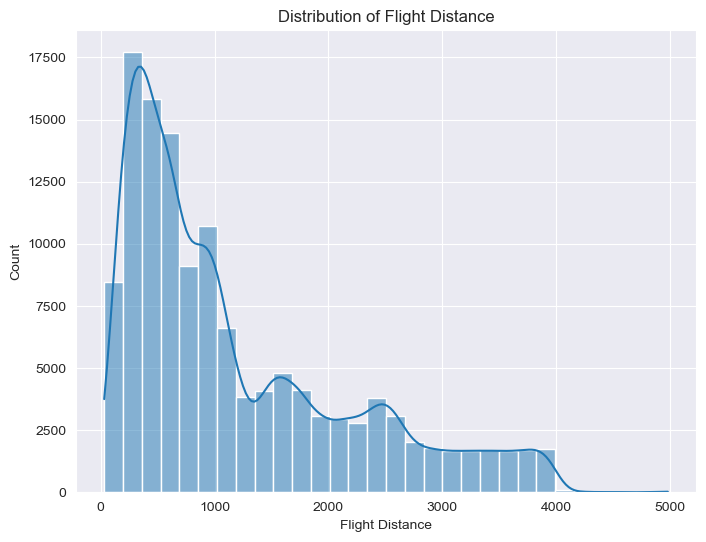

In [16]:

import seaborn as sns
import matplotlib.pyplot as plt



# Create a histogram with a kernel density estimate (KDE)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Flight Distance', bins=30, kde=True)
plt.xlabel('Flight Distance')
plt.title('Distribution of Flight Distance')
plt.show()


In [17]:
import numpy as np

def log_transform_and_remove_outliers(df, column_name, iqr_factor=1.5, in_place=False):


    # Optionally create a copy so we don't modify the original DataFrame
    if not in_place:
        df = df.copy()

    # 1. Log transform the column (ensure it's non-negative)
    df[column_name] = np.log1p(df[column_name])

    # 2. Calculate IQR boundaries on the log-transformed data
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR

    # 3. Create a mask for outliers
    outlier_mask = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

    # 4. Filter them out
    df_no_outliers = df[~outlier_mask]

    return df_no_outliers


In [18]:
df=log_transform_and_remove_outliers(df, 'Flight Distance', iqr_factor=1.5) 
df=log_transform_and_remove_outliers(df, 'Arrival Delay in Minutes', iqr_factor=1.5)
df=log_transform_and_remove_outliers(df, 'Departure Delay in Minutes', iqr_factor=1.5)
df

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,5.913503,0,2,...,3,3,1,5,3,3,4,3,0.000000,0.000000
1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,7.818832,0,2,...,3,2,1,1,4,4,3,2,0.000000,0.000000
2,29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,7.278629,0,3,...,3,3,3,5,3,2,3,3,0.000000,0.000000
3,81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,7.314553,0,4,...,4,4,5,4,5,5,5,4,0.000000,0.000000
4,83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,6.359574,0,5,...,3,3,3,4,5,3,4,3,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,49202,satisfied,Female,Loyal Customer,35,Business travel,Business,7.860571,5,5,...,4,5,5,5,5,5,5,4,0.000000,0.000000
129876,16986,satisfied,Female,Loyal Customer,11,Business travel,Eco,6.415097,5,1,...,5,5,5,4,1,2,5,5,4.418841,4.189655
129877,50316,satisfied,Male,Loyal Customer,46,Business travel,Business,4.465908,1,1,...,5,5,1,3,1,5,2,2,0.000000,0.000000
129878,22333,satisfied,Female,Loyal Customer,35,Business travel,Business,4.430817,1,1,...,5,5,4,4,2,5,5,5,0.000000,0.000000


In [19]:
def hist_plot ( df, column_name):
    
    sns.histplot(df[column_name], kde=True)
    plt.show()
    # Q-Q plot for normal
    stats.probplot(df[column_name], dist="norm", plot=plt)
    plt.show()

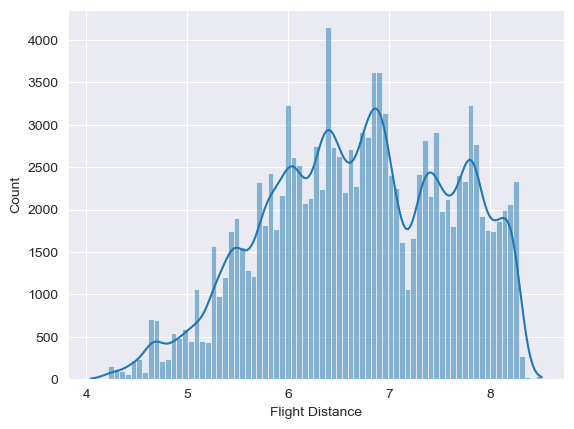

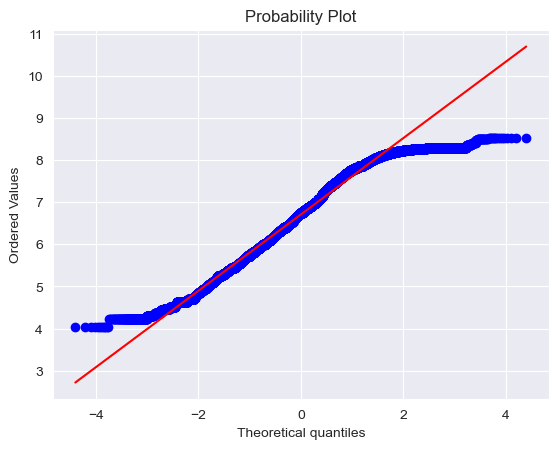

In [20]:
hist_plot ( df, column_name="Flight Distance")


In [19]:
//df.to_csv('satisfaction_log_no_outliers.csv', index=False)//